In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('11-iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.notnull().sum()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [8]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

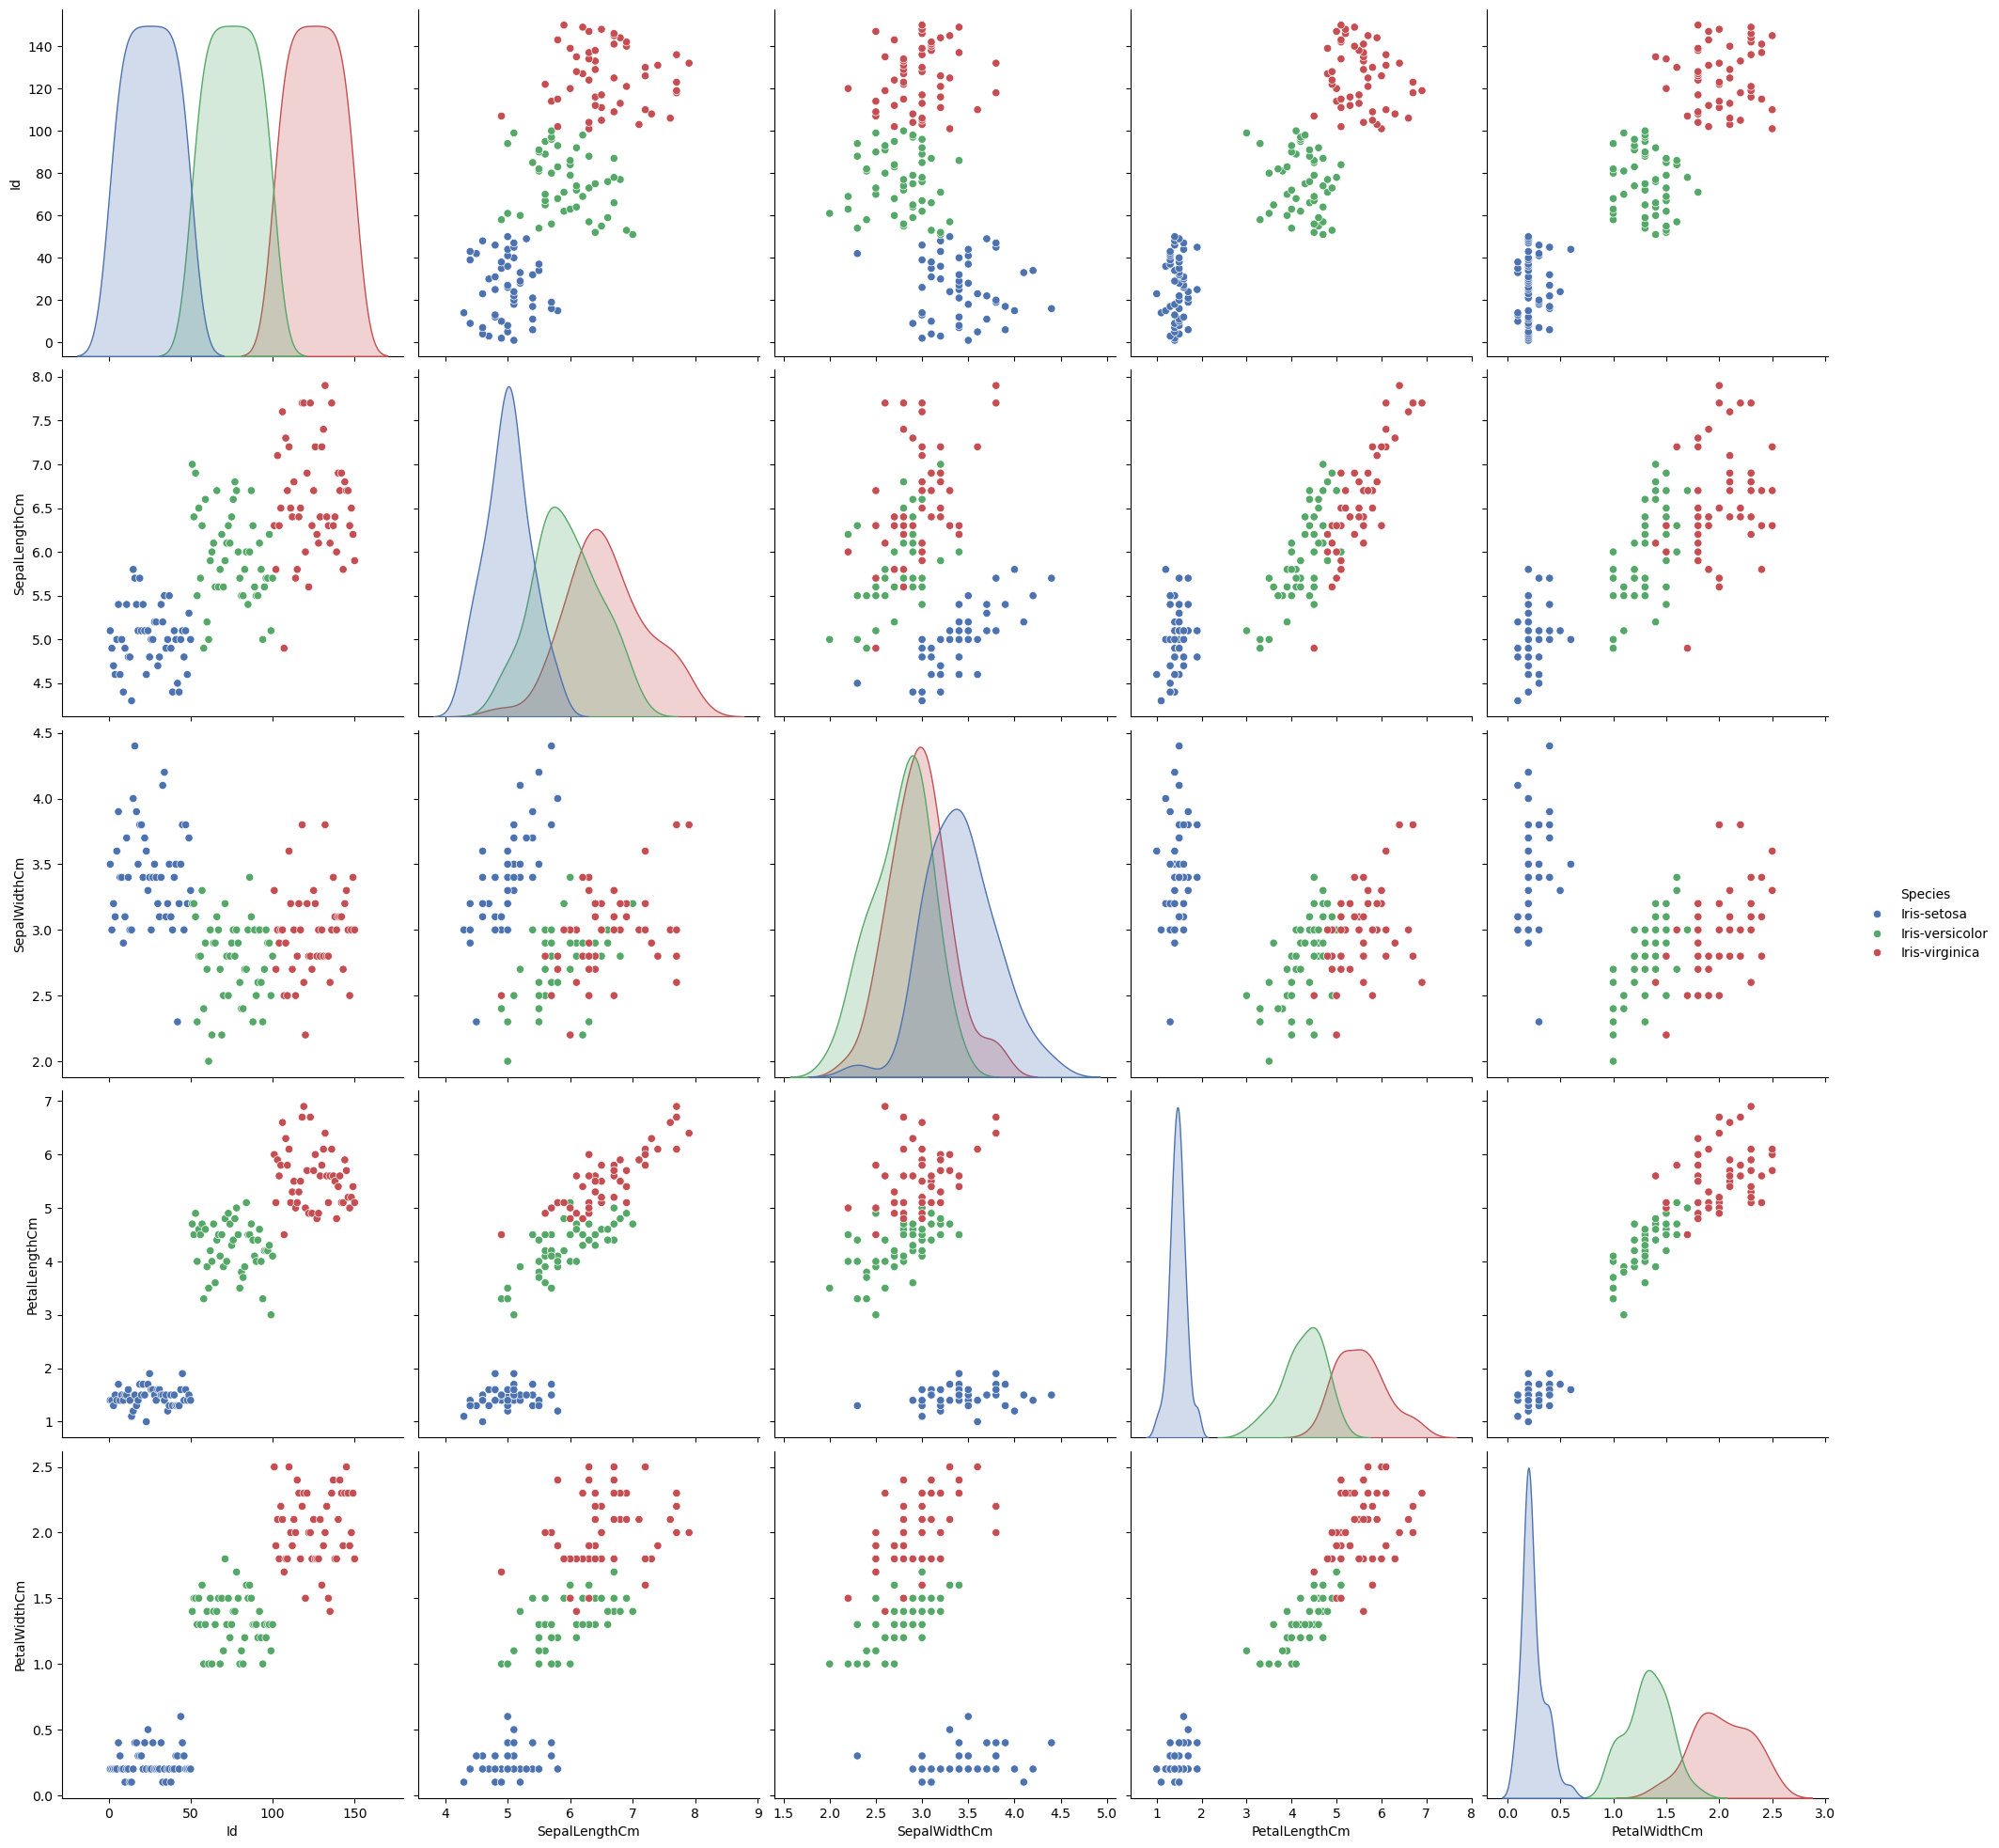

In [10]:
import warnings
warnings.filterwarnings("ignore")

custom_palette = ["#4C72B0", "#55A868", "#C44E52"]  
sns.pairplot(df,hue='Species',palette=custom_palette,size=4) # size = marker size
plt.show()

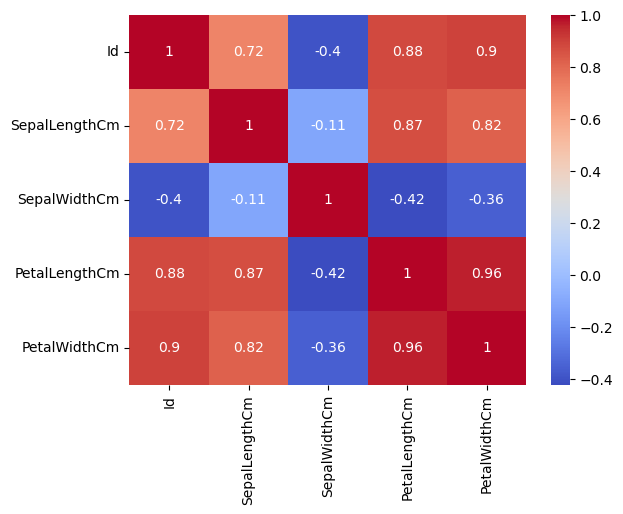

In [11]:
sns.heatmap(df.drop('Species', axis=1).corr(), annot=True, cmap="coolwarm")
plt.show()

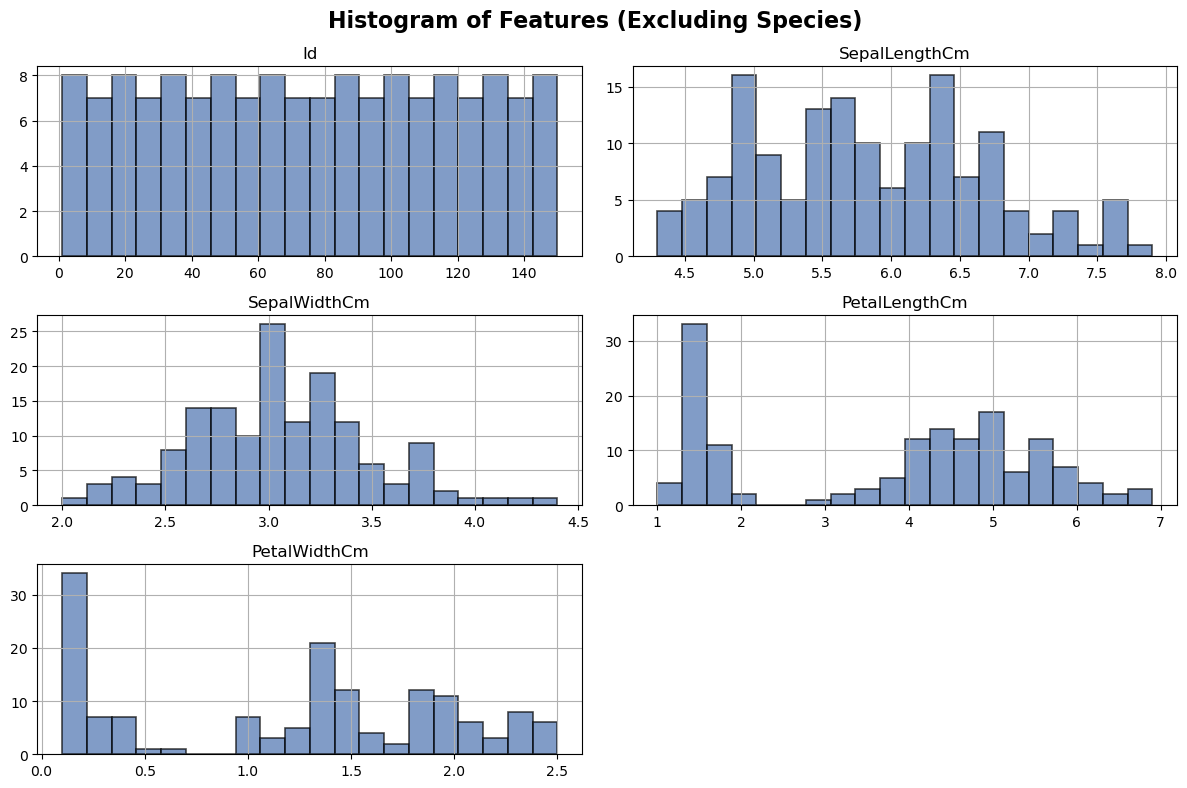

In [12]:
df.drop('Species', axis=1).hist(
    bins=20,               # more boxes
    figsize=(12,8),       
    edgecolor='black',     
    linewidth=1.2,         
    color='#4C72B0',       
    alpha=0.7              # transparency
)

plt.suptitle("Histogram of Features (Excluding Species)", fontsize=16, fontweight="bold")
plt.tight_layout()  # gap for title
plt.show()

In [13]:
df.drop('Species',axis=1).corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [14]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

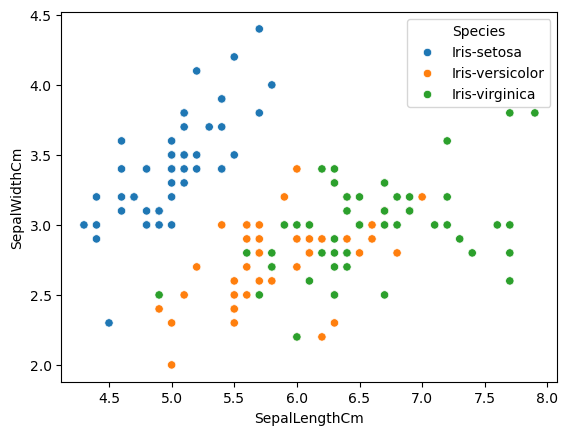

In [15]:
sns.scatterplot(x=df['SepalLengthCm'],y=df['SepalWidthCm'],hue=df['Species'])
plt.show()

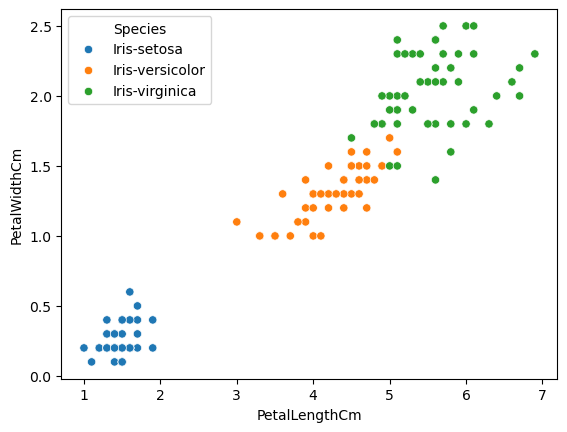

In [16]:
sns.scatterplot(x=df['PetalLengthCm'],y=df['PetalWidthCm'],hue=df['Species'])
plt.show()

In [17]:
df=df.drop('Id',axis=1)

In [18]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
# ----- Label Encoder ------ 

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [23]:
# ----- X and y split -------

In [24]:
X=df.drop('Species',axis=1)
y=df['Species']

In [25]:
# ----- X_train and y_train ------

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [27]:
# ----- Standard Scaler ------

In [28]:
from sklearn.preprocessing import StandardScaler # Genelde Bernoulli ve Multinominal de gerekmez.Gaussian'da olabilir.

In [29]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [30]:
# ---- Naive Bayes ------

In [31]:
from sklearn.naive_bayes import GaussianNB #,BernoulliNB, MultinomialNB

In [32]:
gnb=GaussianNB()
gnb.fit(X_train_scaled,y_train) #fit → modelin eğitilmesi için kullanılır.
y_pred=gnb.predict(X_test_scaled)

In [33]:
# ----- Metrics ------

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [35]:
print('accuracy_score :', accuracy_score(y_pred,y_test))
print('------------------------')
print('classification report :', classification_report(y_pred,y_test))
print('------------------------')
print('confusion matrix : \n', confusion_matrix(y_pred,y_test))

accuracy_score : 1.0
------------------------
classification report :                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

------------------------
confusion matrix : 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]


In [36]:
# ----- Logistic Regression -------

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [39]:
y_pred=model.predict(X_test_scaled)

print("Accuracy :", accuracy_score(y_test, y_pred))
print('------------------------')
print("Report:\n", classification_report(y_test, y_pred))
print('------------------------')
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy : 1.0
------------------------
Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

------------------------
Confusion matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]


In [40]:
# ----- SVC -----

In [41]:
from sklearn.svm import SVC

In [42]:
svc=SVC()

In [43]:
#---- GridSearcCV ------

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.001],
    'kernel':['rbf','linear']
    }

In [46]:
grid=GridSearchCV(estimator=svc, param_grid=param_grid, n_jobs=-1, verbose=3)

In [47]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [48]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [49]:
y_pred = grid.predict(X_test)

In [50]:
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor'], dtype=object)

[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.909 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.909 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.957 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.957 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.826 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.773 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.773 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.957 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma